In [82]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.color_palette("mako", as_cmap=True)
plt.rcParams['figure.figsize'] = 8,5

In [83]:
movies = pd.read_csv('P4-Movie-Ratings.csv')

In [84]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [85]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating',
       'BudgetMillions', 'Year']

In [86]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [87]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   CriticRating    559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   BudgetMillions  559 non-null    int64 
 5   Year            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [88]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [89]:
#Convert numeric int categorical variables
movies.Year = movies.Year.astype('category')
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')

In [90]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [91]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [92]:
#Jointplots

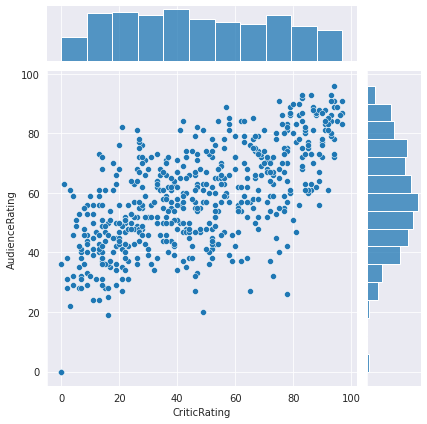

In [93]:
j = sns.jointplot(data=movies, x="CriticRating", y="AudienceRating")

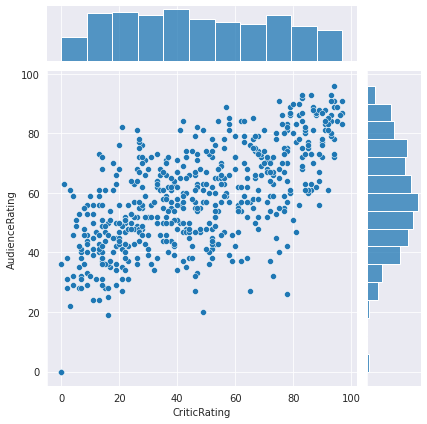

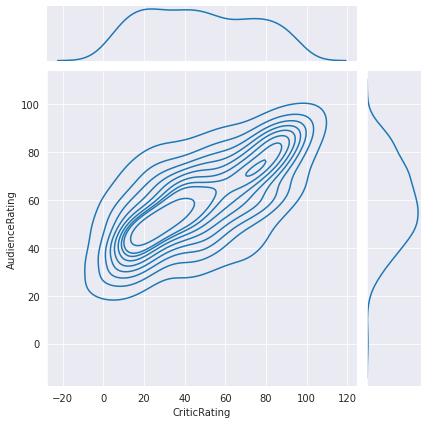

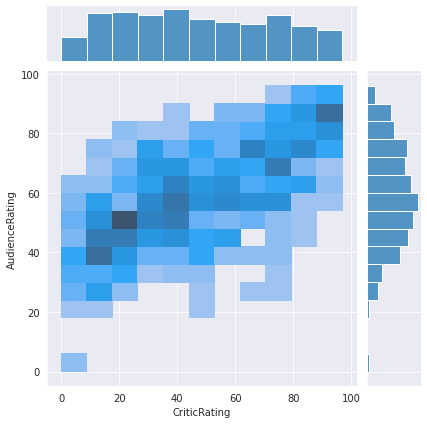

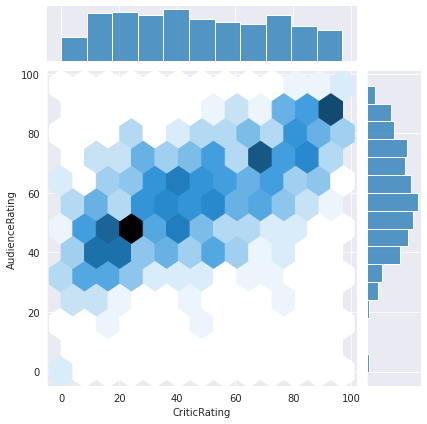

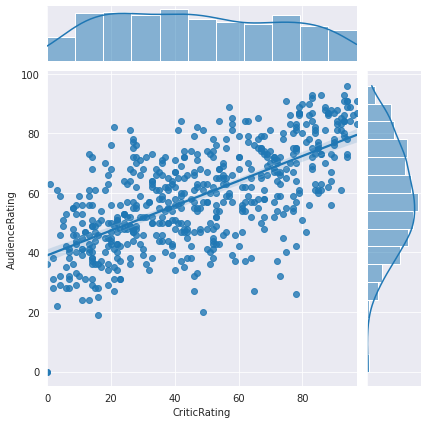

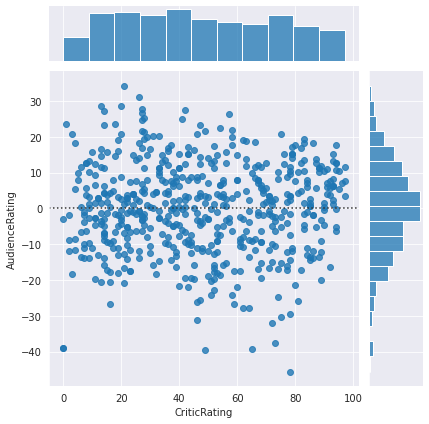

In [106]:
for kind in [ "scatter" , "kde" , "hist" , "hex" , "reg" , "resid" ]:
    j = sns.jointplot(data=movies, x="CriticRating", y="AudienceRating", kind=kind )

---------

In [95]:
#Histogram

<AxesSubplot:xlabel='AudienceRating', ylabel='Density'>

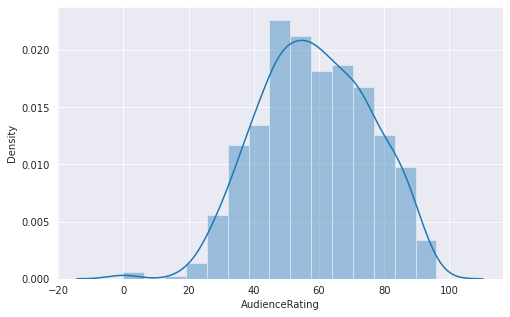

In [96]:

sns.set_style("darkgrid")
sns.distplot(movies.AudienceRating, bins=15)

<AxesSubplot:xlabel='CriticRating', ylabel='Density'>

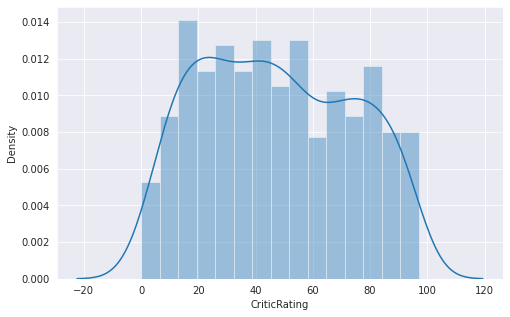

In [97]:
sns.set_style("darkgrid")
sns.distplot(movies.CriticRating, bins=15)

(array([ 2.,  0.,  1.,  5., 20., 42., 48., 81., 76., 65., 67., 60., 45.,
        35., 12.]),
 array([ 0. ,  6.4, 12.8, 19.2, 25.6, 32. , 38.4, 44.8, 51.2, 57.6, 64. ,
        70.4, 76.8, 83.2, 89.6, 96. ]),
 <BarContainer object of 15 artists>)

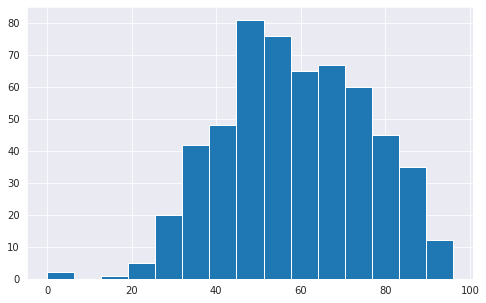

In [98]:
plt.hist(movies.AudienceRating, bins=15)

(array([19., 32., 51., 41., 46., 41., 47., 38., 47., 28., 37., 32., 42.,
        29., 29.]),
 array([ 0.        ,  6.46666667, 12.93333333, 19.4       , 25.86666667,
        32.33333333, 38.8       , 45.26666667, 51.73333333, 58.2       ,
        64.66666667, 71.13333333, 77.6       , 84.06666667, 90.53333333,
        97.        ]),
 <BarContainer object of 15 artists>)

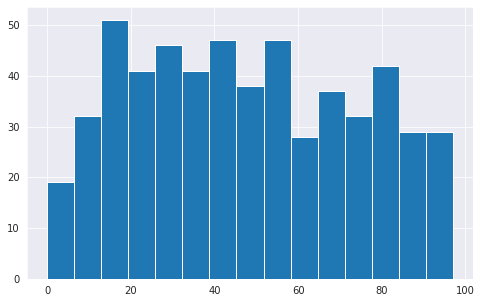

In [99]:
plt.hist(movies.CriticRating
         , bins=15)

In [100]:
import pandas_profiling

In [101]:
movies.profile_report()

In [102]:
#Stacked histogram


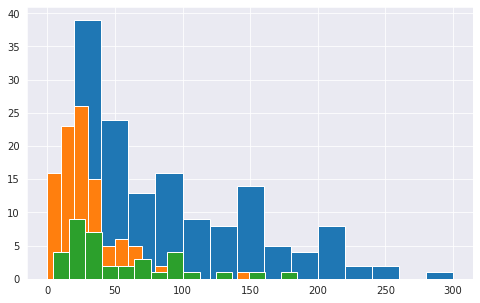

In [103]:
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins=15)
plt.show()

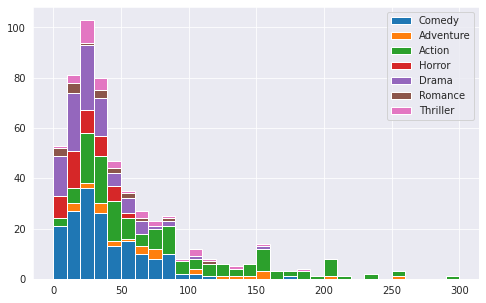

In [104]:
genres = []
mylabels = []
for genre in movies.Genre.unique(): # movies.Genre.cat.categories also works
    genres.append(movies[movies.Genre == genre].BudgetMillions)
    mylabels.append(genre)

plt.hist(genres, stacked=True, bins=30, rwidth=1, label=mylabels)
plt.legend()
plt.show()

In [122]:
#KDE

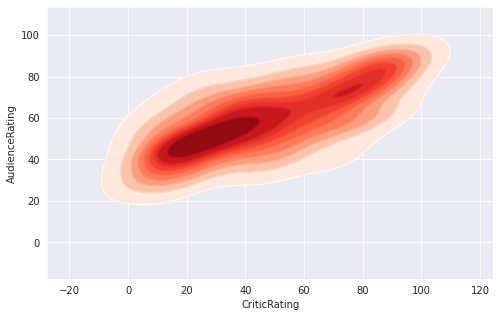

In [140]:
k1 = sns.kdeplot(data=movies, x='CriticRating', y='AudienceRating',shade_lowest=False, cmap="Reds")
k1 = sns.kdeplot(data=movies, x='CriticRating', y='AudienceRating',shade=True, shade_lowest=False, cmap="Reds")

In [143]:
#Working with Subplots()

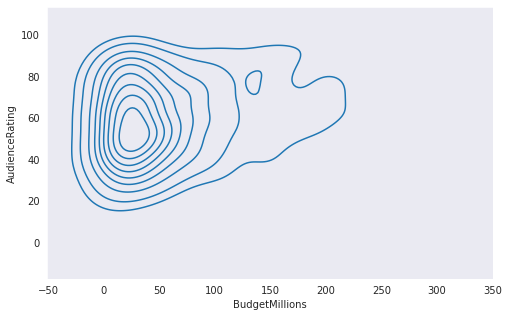

In [150]:
sns.set_style('dark')
sns.kdeplot(data=movies, x='BudgetMillions', y='AudienceRating',shade_lowest=False)
plt.show()

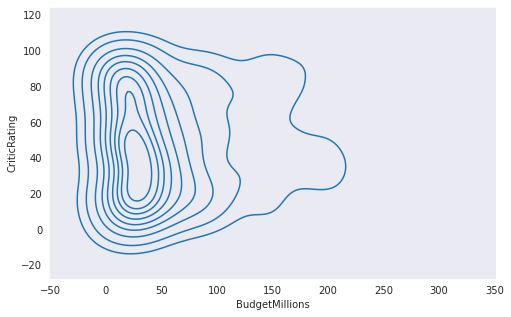

In [149]:
sns.kdeplot(data=movies, x='BudgetMillions', y='CriticRating',shade_lowest=False)
plt.show()

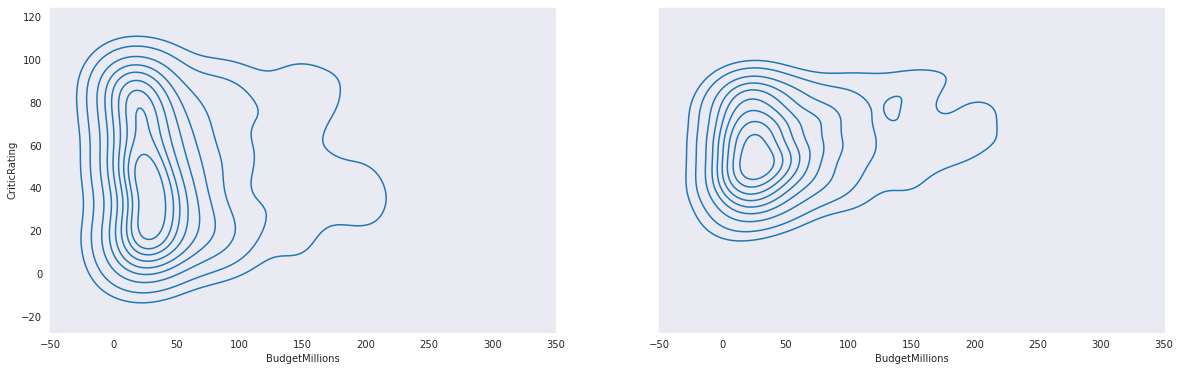

In [167]:
f, ax = plt.subplots(1,2, figsize=(20,6), sharex=True, sharey=True)
k1 = sns.kdeplot(data=movies, x='BudgetMillions', y='CriticRating',shade_lowest=False, ax=ax[0])
k2 = sns.kdeplot(data=movies, x='BudgetMillions', y='AudienceRating',shade_lowest=False, ax=ax[1])
# k1.set(xlim=(0,160))
plt.show()

<AxesSubplot:xlabel='Genre', ylabel='CriticRating'>

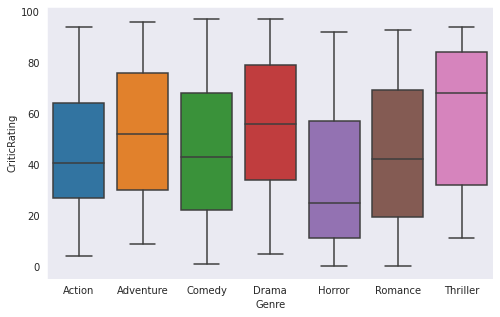

In [168]:
#Violin plot
sns.boxplot(data=movies, x='Genre', y='CriticRating')

<AxesSubplot:xlabel='Genre', ylabel='CriticRating'>

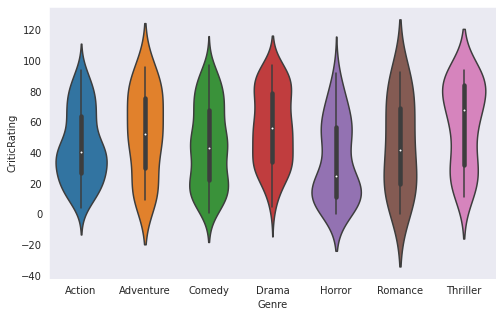

In [169]:
sns.violinplot(data=movies, x='Genre', y='CriticRating')

<AxesSubplot:xlabel='Year', ylabel='CriticRating'>

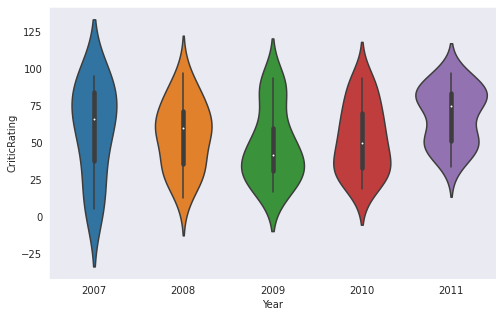

In [171]:
sns.violinplot(data=movies[movies.Genre == 'Drama'], x='Year', y='CriticRating')

In [172]:
#Facetgrid

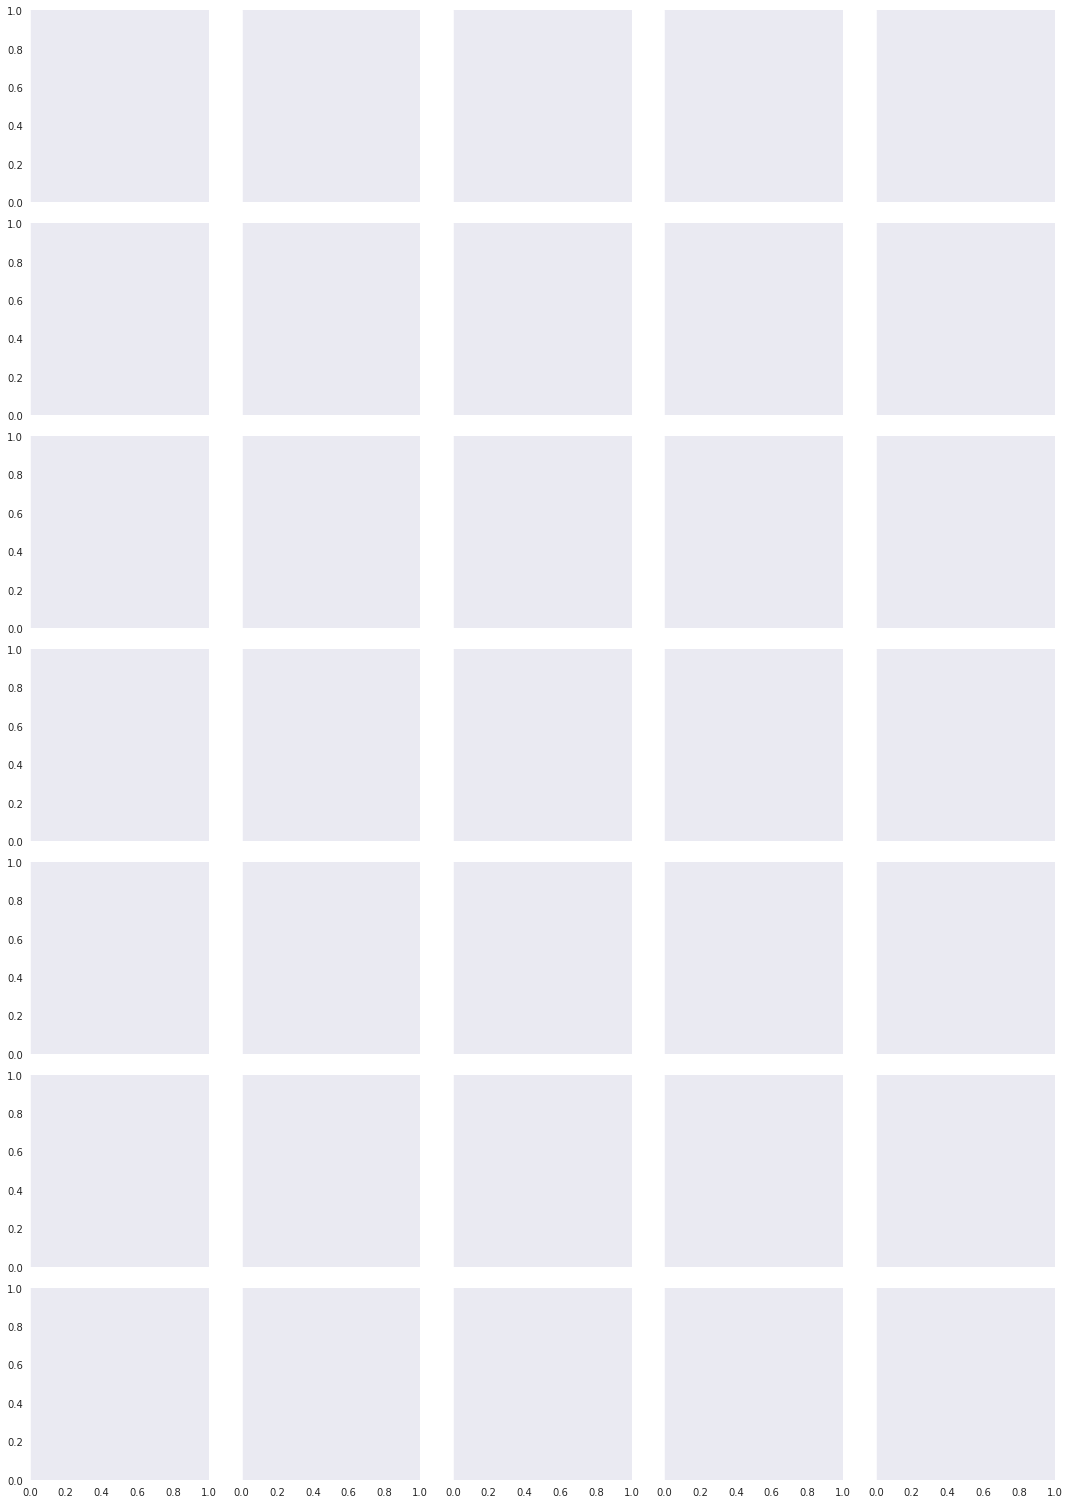

In [177]:
g = sns.FacetGrid(movies, row="Genre", col='Year', hue='Genre')

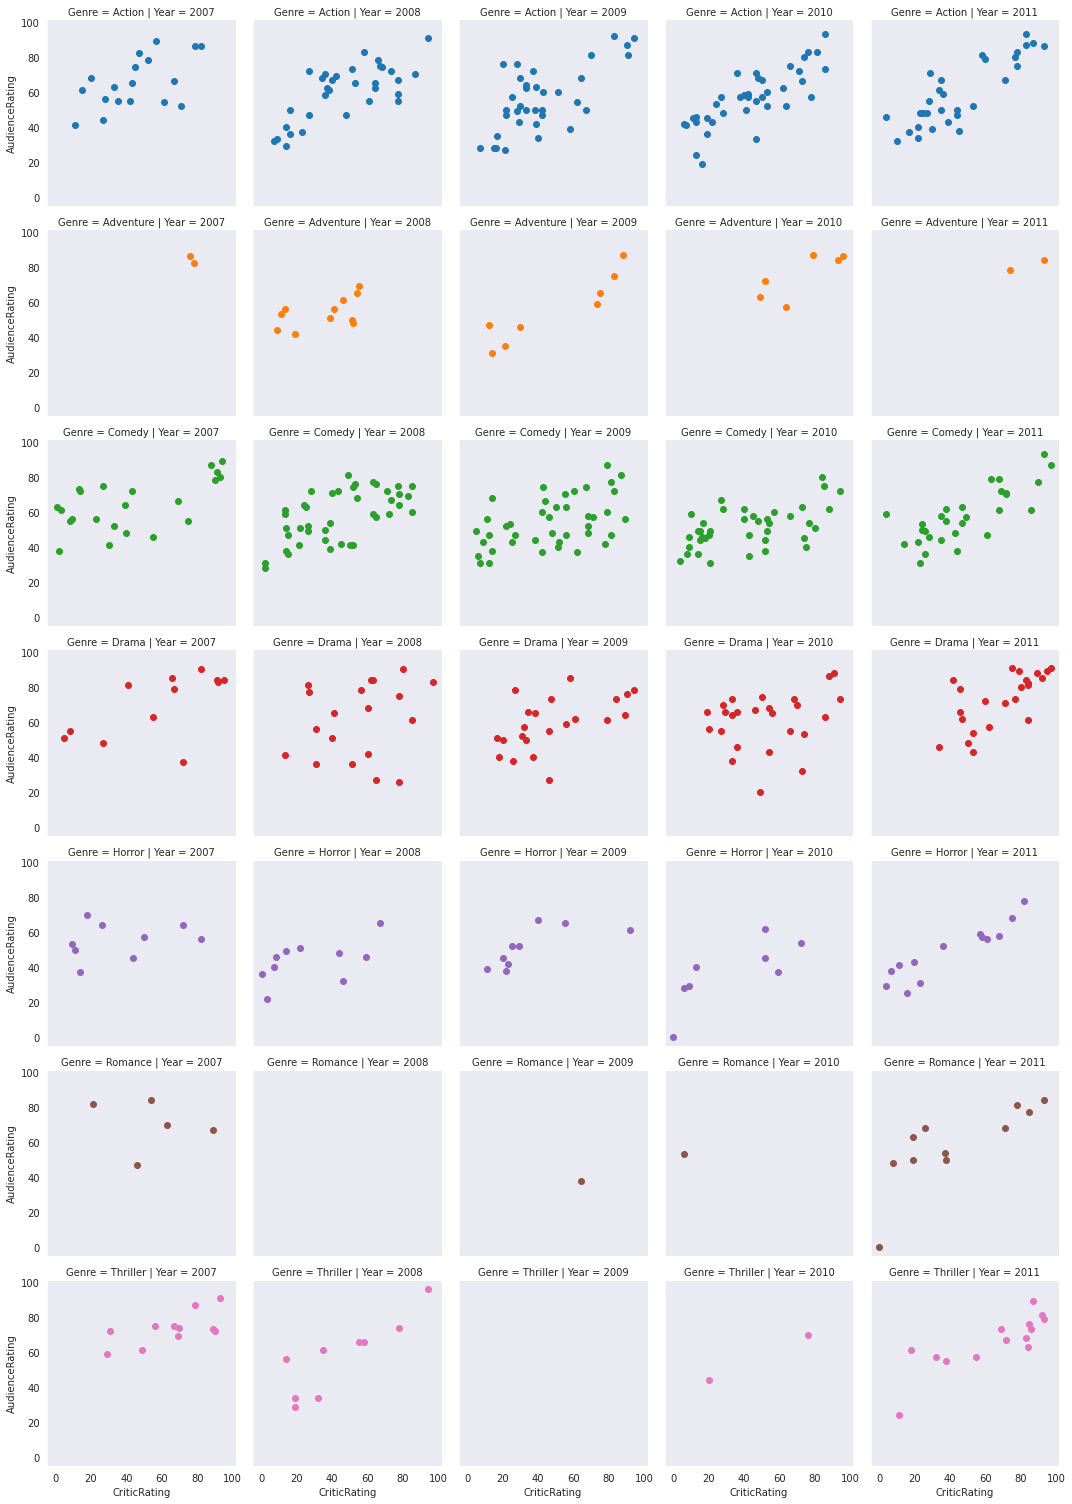

In [180]:
g = sns.FacetGrid(movies, row="Genre", col='Year', hue='Genre')
g = g.map(plt.scatter, 'CriticRating','AudienceRating')

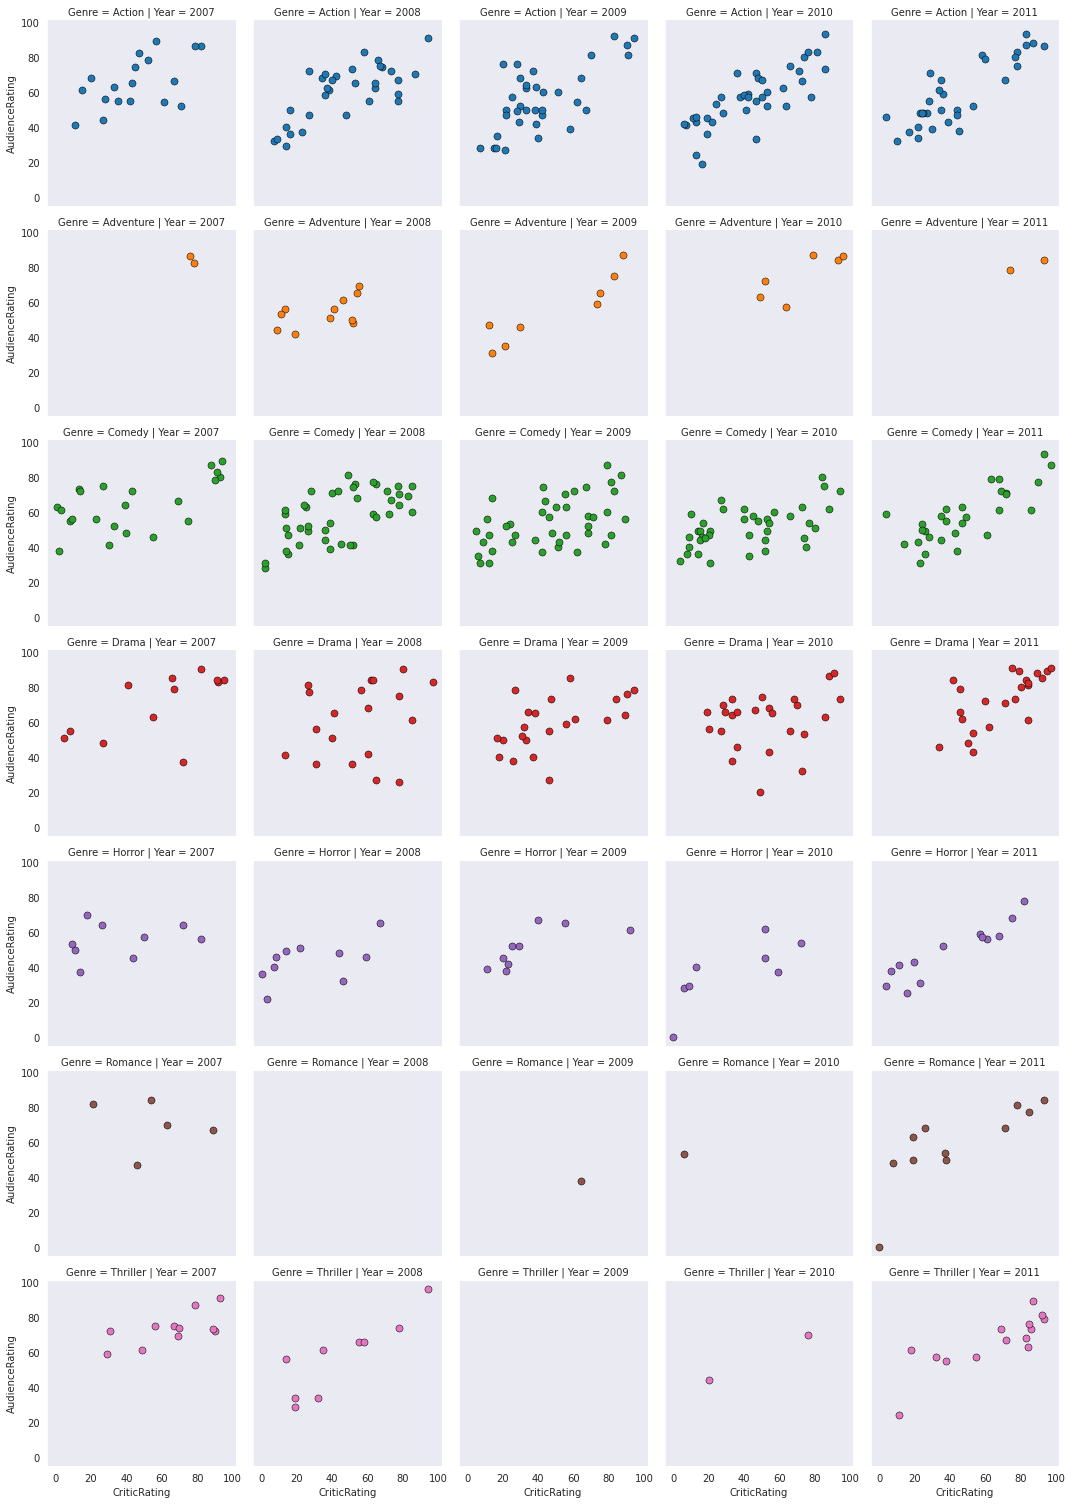

In [183]:
g = sns.FacetGrid(movies, row="Genre", col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black' )
g = g.map(plt.scatter, 'CriticRating','AudienceRating',**kws)

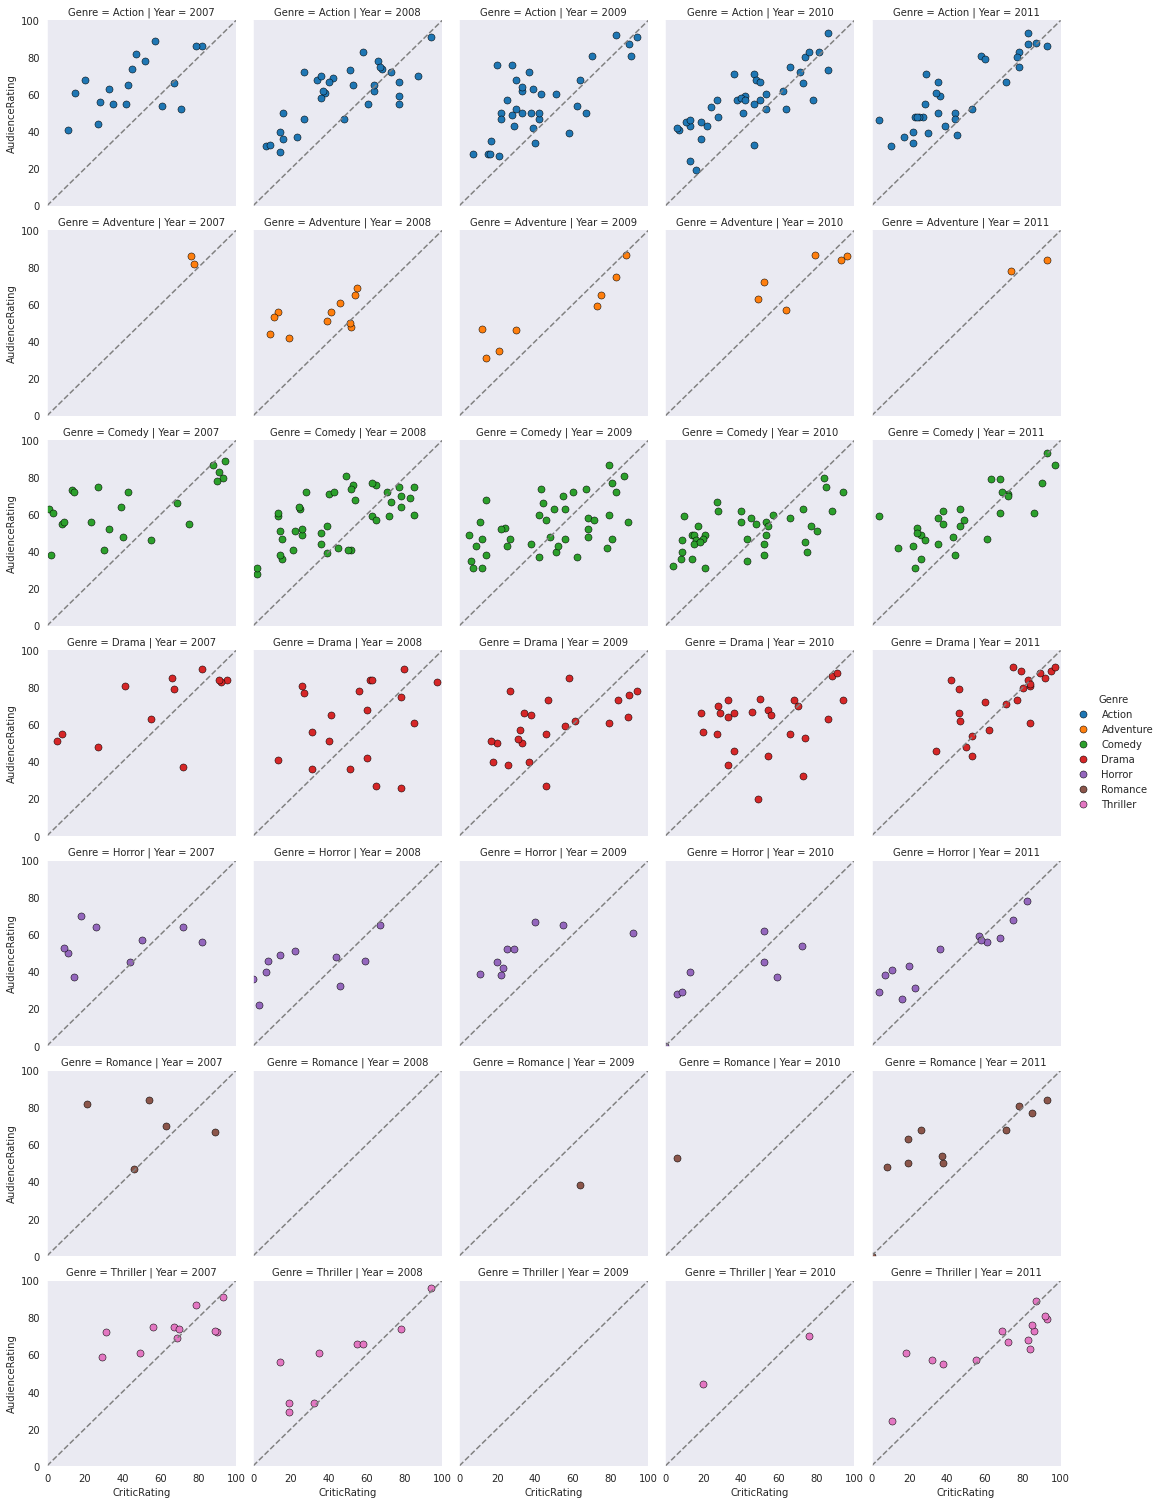

In [188]:
#Controlling Axes and Adding Diagonals

g = sns.FacetGrid(movies, row="Genre", col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black' )
g = g.map(plt.scatter, 'CriticRating','AudienceRating',**kws)
g.set(xlim=(0,100), ylim=(0,100))

for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c='gray', ls='--')
g.add_legend()

In [189]:
#Building Dashboards